In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

df = pd.read_csv("logistics_data.csv", parse_dates=["sales_date"], dayfirst=True)
df = df.sort_values("sales_date")

In [5]:
df.head()

,order_id,product_id,sales_date,quantity_sold,unit_price,total_sales,shipment_id,shipment_date,delivery_date,logistics_cost
0,51,16,2024-01-01,3,75.28,225.84,1062,2023-12-29,2024-01-04,87.39
1,52,29,2024-01-02,8,50.94,407.52,1216,2023-12-29,2024-01-05,24.13
2,53,24,2024-01-03,6,94.94,569.64,1853,2024-01-01,2024-01-07,21.46
3,54,20,2024-01-04,3,31.00,93.00,1826,2024-01-01,2024-01-06,75.76
4,55,17,2024-01-05,1,47.29,47.29,1794,2024-01-03,2024-01-07,99.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        100 non-null    int64  
 1   product_id      100 non-null    int64  
 2   sales_date      100 non-null    object 
 3   quantity_sold   100 non-null    int64  
 4   unit_price      100 non-null    float64
 5   total_sales     100 non-null    float64
 6   shipment_id     100 non-null    int64  
 7   shipment_date   100 non-null    object 
 8   delivery_date   100 non-null    object 
 9   logistics_cost  100 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 7.9+ KB
None
         order_id  product_id  quantity_sold  unit_price  total_sales  \
count  100.000000  100.000000     100.000000  100.000000   100.000000   
mean   100.500000   19.010000       4.770000   63.996300   305.569700   
std     29.011492    5.535003       2.589236   23.442986   206.512505 

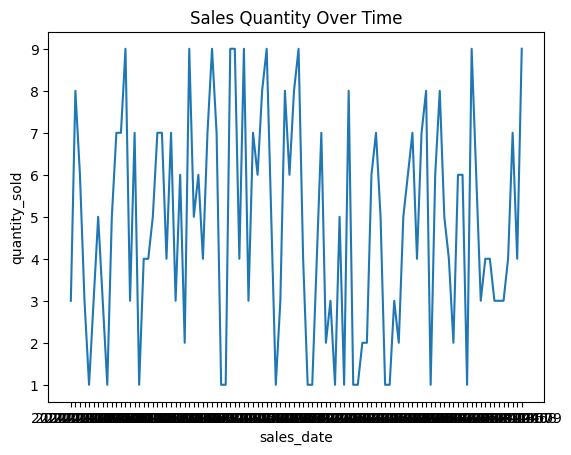

In [ ]:

print(df.info())
print(df.describe())
sns.lineplot(x='sales_date', y='quantity_sold', data=df)
plt.title("Sales Quantity Over Time")
plt.show()

In [ ]:

model = ARIMA(df['quantity_sold'], order=(2,1,2))  
arima_fit = model.fit()


forecast_steps = 10  
forecast = arima_fit.forecast(steps=forecast_steps)


c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:

df['sales_date'] = pd.to_datetime(df['sales_date'])
df.set_index('sales_date', inplace=True)  


model = ARIMA(df['quantity_sold'], order=(2,1,2))  
arima_fit = model.fit()

c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Akshaya\OneDrive\Desktop\Xcelerate\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
forecast_steps = 10  
forecast = arima_fit.forecast(steps=forecast_steps)


In [ ]:

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')


In [15]:
future_dates

DatetimeIndex(['2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
               '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19'],
              dtype='datetime64[ns]', freq='D')

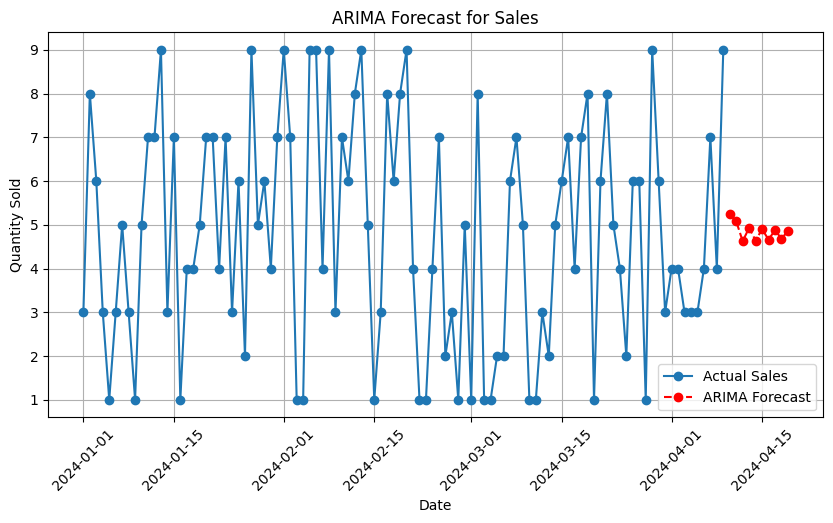

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['quantity_sold'], label="Actual Sales", marker='o')
plt.plot(future_dates, forecast, label="ARIMA Forecast", linestyle='dashed', marker='o', color='red')
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.title("ARIMA Forecast for Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:

forecast_df = pd.DataFrame({'sales_date': future_dates, 'forecast_quantity_sold': forecast})
print(forecast_df)

           sales_date  forecast_quantity_sold
2024-04-10 2024-04-10                5.249398
2024-04-11 2024-04-11                5.078515
2024-04-12 2024-04-12                4.625053
2024-04-13 2024-04-13                4.929817
2024-04-14 2024-04-14                4.637372
2024-04-15 2024-04-15                4.897897
2024-04-16 2024-04-16                4.662579
2024-04-17 2024-04-17                4.874569
2024-04-18 2024-04-18                4.683499
2024-04-19 2024-04-19                4.855698


10:23:26 - cmdstanpy - INFO - Chain [1] start processing
10:23:26 - cmdstanpy - INFO - Chain [1] done processing


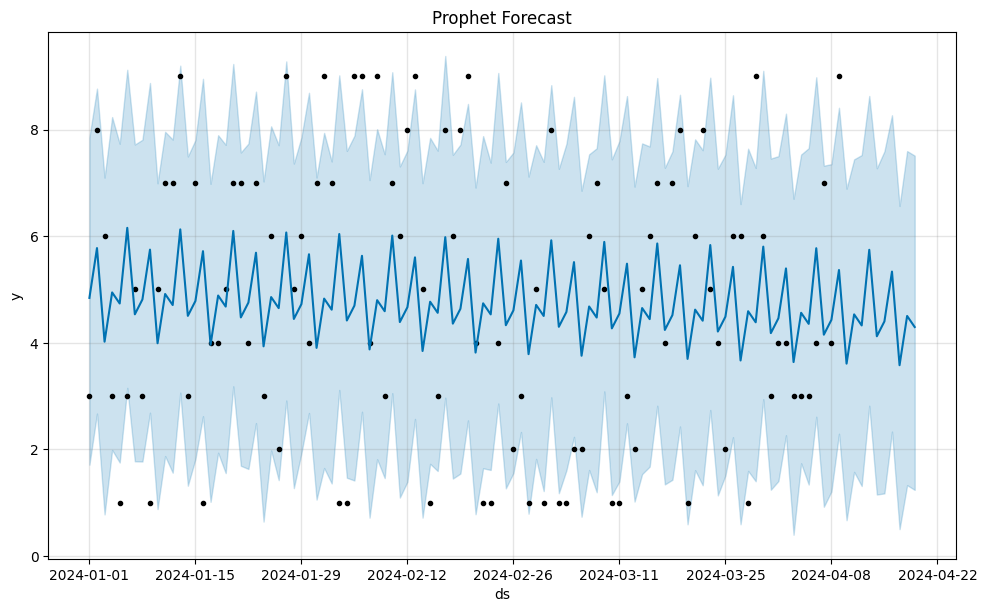

In [ ]:
df=pd.read_csv("logistics_data.csv")
df_prophet = df.rename(columns={"sales_date": "ds", "quantity_sold": "y"})[["ds", "y"]]

prophet_model = Prophet()
prophet_model.fit(df_prophet)


future_dates = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future_dates)


prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler



data = pd.read_csv(r"C:\Users\Akshaya\OneDrive\Desktop\Xcelerate\chat_gpt\logistics_data.csv", parse_dates=["sales_date"])
data = data.sort_values("sales_date")

data["sales_date"] = (data["sales_date"] - data["sales_date"].min()).dt.days


scaler = MinMaxScaler()
data["quantity_sold"] = scaler.fit_transform(data[["quantity_sold"]])



def create_sequences(data, target_col="quantity_sold", lag=10):
    sequences, targets = [], []
    for i in range(len(data) - lag):
        sequences.append(data.iloc[i:i+lag][target_col].values)
        targets.append(data.iloc[i+lag][target_col])
    return np.array(sequences), np.array(targets)


lag = 10
X, y = create_sequences(data, lag=lag)

X_torch = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  
y_torch = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

train_size = int(0.8 * len(X))
X_train, X_test = X_torch[:train_size], X_torch[train_size:]
y_train, y_test = y_torch[:train_size], y_torch[train_size:]

class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])  


model = GRUModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    y_pred_train = model(X_train)
    loss = criterion(y_pred_train, y_train)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).numpy()


y_pred_test = scaler.inverse_transform(y_pred_test)
y_test_actual = scaler.inverse_transform(y_test.numpy())


def forecast_future(model, data, steps=10):
    """ Generate future predictions using the last known data. """
    model.eval()
    input_seq = torch.tensor(data[-lag:].values, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)  # Reshape

    predictions = []
    for _ in range(steps):
        with torch.no_grad():
            pred = model(input_seq).item()
        predictions.append(pred)

        
        input_seq = torch.cat((input_seq[:, 1:, :], torch.tensor([[[pred]]])), dim=1)

    return np.array(predictions)


future_predictions = forecast_future(model, data["quantity_sold"], steps=10)


future_predictions_actual = scaler.inverse_transform(future_predictions.reshape(-1, 1))




Epoch [10/50], Loss: 0.1276
Epoch [20/50], Loss: 0.1246
Epoch [30/50], Loss: 0.1145
Epoch [40/50], Loss: 0.1126
Epoch [50/50], Loss: 0.1123
